In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data=pd.read_csv(r'C:\Users\Shamnad S\Downloads\Drug_SideEffects.csv')

In [3]:
##preview the data
data.head()

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41.0,White,Mild Side Effects
1,Aaban,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.0,White,Mild Side Effects
3,Aabha,F,voltaren,44.0,White,Severe Side Effects
4,Aabid,M,tramadol,24.0,White,No Side Effects


In [4]:
##total rows and columns
data.shape

(400000, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   NAME          400000 non-null  object 
 1   GENDER        400000 non-null  object 
 2   DRUG NAME     400000 non-null  object 
 3   AGE           399980 non-null  float64
 4   RACE          400000 non-null  object 
 5   SIDE EFFECTS  400000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 18.3+ MB


In [6]:
##summary statistics
data.describe()

,AGE
count,399980.000000
mean,41.466513
std,12.550773
min,14.000000
25%,31.000000
50%,41.000000
75%,51.000000
max,600.000000


In [7]:
##check datatypes
data.dtypes

NAME             object
GENDER           object
DRUG NAME        object
AGE             float64
RACE             object
SIDE EFFECTS     object
dtype: object

In [8]:
##checking missing values
data.isnull().sum()

NAME             0
GENDER           0
DRUG NAME        0
AGE             20
RACE             0
SIDE EFFECTS     0
dtype: int64

In [9]:
data.shape

(400000, 6)

In [10]:
data.sort_values(by="AGE",ascending=True).head()

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
194153,Kartina,F,solodyn,14.0,White,Moderate Side Effects
301395,Quinnshawn,M,solodyn,14.0,White,Moderate Side Effects
52610,Britteni,F,solodyn,14.0,White,Moderate Side Effects
134779,Gaynelle,F,solodyn,14.0,White,Moderate Side Effects
113412,Elner,F,solodyn,14.0,White,Moderate Side Effects


In [11]:
data.sort_values(by="NAME",ascending=True).head()

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
118,A'Aff,F,adderall,24.0,White,Moderate Side Effects
768,A'Aron,M,doxycycline,26.0,White,Mild Side Effects
3937,A'Dele,F,claripel-cream,18.0,White,No Side Effects
7745,A'Isha,F,zoloft,58.0,White,No Side Effects
7749,A'Ishah,F,cipro,26.0,White,No Side Effects


# EXPLORATORY DATA ANALYIS

In [12]:
#Checking value counts of "GENDER"
data["GENDER"].value_counts()

F    237751
M    162249
Name: GENDER, dtype: int64

(array([0, 1]), [Text(0, 0, 'M'), Text(1, 0, 'F')])

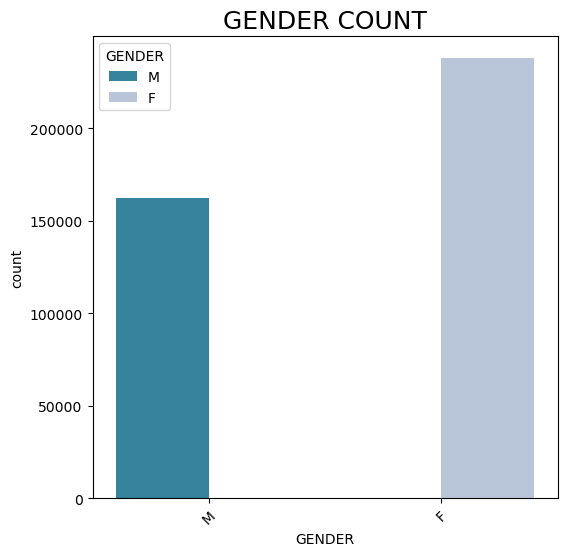

In [13]:
data["GENDER"].value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='GENDER',hue='GENDER',data=data,palette="PuBuGn_r")
plt.title("GENDER COUNT",fontsize=18 )
plt.xticks(rotation=45)

In [14]:
#Checking value counts of "RACE"
data["RACE"].value_counts()

White              314074
Hispanic, White     44072
Black               35845
Unknown              3046
Hispanic, Black      1673
Other                1010
Asian, Other          168
Asian Indian          104
Chinese                 8
Name: RACE, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Hispanic, White'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Black'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Hispanic, Black'),
  Text(6, 0, 'Asian, Other'),
  Text(7, 0, 'Asian Indian'),
  Text(8, 0, 'Chinese')])

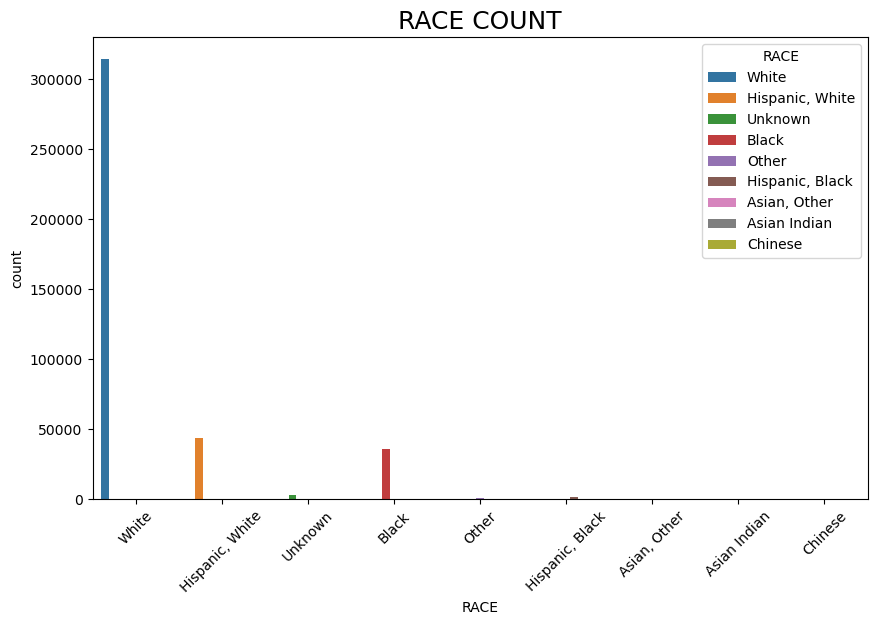

In [15]:
data["RACE"].value_counts()
plt.figure(figsize=(10,6))
sns.countplot(x='RACE',hue='RACE',data=data)
plt.title("RACE COUNT",fontsize=18 )
plt.xticks(rotation=45)

In [16]:
#Checking value counts of "DRUG NAME"
data["DRUG NAME"].value_counts()

paxil         6269
lamictal      6045
nexium        6029
levoxyl       5958
ambien        5692
              ... 
lantus           8
periostat        8
proair-hfa       8
bactrim-ds       8
arimidex         8
Name: DRUG NAME, Length: 502, dtype: int64

In [17]:
#Checking Unique values of "SIDE EFFECTS"
data["SIDE EFFECTS"].unique()

array(['Mild Side Effects', 'Extremely Severe Side Effects',
       'Severe Side Effects', 'No Side Effects', 'Moderate Side Effects'],
      dtype=object)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Mild Side Effects'),
  Text(1, 0, 'Extremely Severe Side Effects'),
  Text(2, 0, 'Severe Side Effects'),
  Text(3, 0, 'No Side Effects'),
  Text(4, 0, 'Moderate Side Effects')])

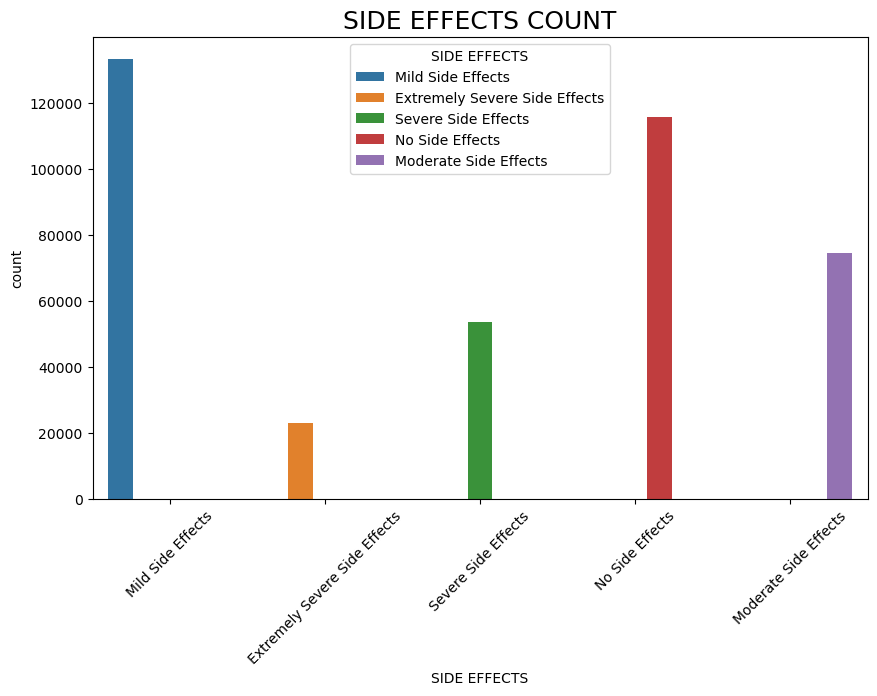

In [18]:
data["SIDE EFFECTS"].value_counts()
plt.figure(figsize=(10,6))
sns.countplot(x='SIDE EFFECTS',hue='SIDE EFFECTS',data=data)
plt.title("SIDE EFFECTS COUNT",fontsize=18 )
plt.xticks(rotation=45)

# DATA PREPROCESSING

In [19]:
#Checking the null values in column "AGE"
data.AGE.isna().sum()

20

In [20]:
#filling the missing values in age with respect to the median of it.
data["AGE"]=data["AGE"].fillna(data["AGE"].median())
data.isna().sum()

NAME            0
GENDER          0
DRUG NAME       0
AGE             0
RACE            0
SIDE EFFECTS    0
dtype: int64

In [21]:
#Drop the column "Name" which doesn't give any contribution for the modelling
data = data.drop(['NAME'], axis =1)
data.head(3)


,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,M,topamax,41.0,White,Mild Side Effects
1,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,F,tazorac,31.0,White,Mild Side Effects


# OUTLIERS IN THE DATA

In [22]:
import numpy as np

In [23]:
# Calculate quartile values for 'AGE' using 30,60 and 90 percentile values
Q1=np.percentile(data["AGE"],30,interpolation= "midpoint")
Q2=np.percentile(data["AGE"],60,interpolation= "midpoint")
Q3=np.percentile(data["AGE"],90,interpolation= "midpoint")
print("value of Q1:",Q1)
print("value of Q2:",Q2)
print("value of Q3:",Q3)

value of Q1: 34.0
value of Q2: 45.0
value of Q3: 57.0


C:\Users\Shamnad S\AppData\Local\Temp\ipykernel_9080\4135929245.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data["AGE"],30,interpolation= "midpoint")
C:\Users\Shamnad S\AppData\Local\Temp\ipykernel_9080\4135929245.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data["AGE"],60,interpolation= "midpoint")
C:\Users\Shamnad S\AppData\Local\Temp\ipykernel_9080\4135929245.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', '

In [24]:
data["AGE"].median()

41.0

In [25]:
IQR= Q3-Q1

In [26]:
Upper_lim= Q3+1.5*IQR
Lower_lim=Q1-1.5*IQR
print("Upper limit value is:",Upper_lim)
print("Lower limit value is:",Lower_lim)

Upper limit value is: 91.5
Lower limit value is: -0.5


In [27]:
outlier=[]
for x in data["AGE"]:
    if((x>Upper_lim)or(x<Lower_lim)):
        outlier.append(x)

In [28]:
outlier

[300.0,
 302.0,
 500.0,
 400.0,
 203.0,
 160.0,
 400.0,
 191.0,
 450.0,
 390.0,
 155.0,
 300.0,
 390.0,
 600.0,
 211.0,
 600.0,
 401.0,
 300.0,
 390.0]

In [29]:
ind_val=data["AGE"]>Upper_lim
data.loc[ind_val].index

Int64Index([  3008,  41048,  66169,  85047, 111850, 119574, 127240, 171643,
            174039, 174487, 224733, 232518, 264849, 290165, 325631, 333669,
            337790, 384352, 393820],
           dtype='int64')

In [30]:
data.drop([ 3008,  41048,  66169,  85047, 111850, 119574, 127240, 171643,
            174039, 174487, 224733, 232518, 264849, 290165, 325631, 333669,
            337790, 384352, 393820],inplace=True)

# LABEL ENCODING AND MAPPING

In [31]:
data01 = data.copy()

In [32]:
from sklearn.preprocessing import LabelEncoder

cols = []
for i in data01.columns:
    if data01[i].dtype == 'object':
        cols.append(i)

labelencoder = LabelEncoder()
mapping =[]
for i in cols:
    data01[i] = labelencoder.fit_transform(data01[i])
    lemap = dict(zip(labelencoder.classes_,labelencoder.transform(labelencoder.classes_)))
    mapping.append(lemap)

print(f"Mapped labels of the features in data01 are {mapping}")

Mapped labels of the features in data01 are [{'F': 0, 'M': 1}, {'abilify': 0, 'accolate': 1, 'accupril': 2, 'accutane': 3, 'aciphex': 4, 'actiq': 5, 'actonel': 6, 'actos': 7, 'acyclovir': 8, 'aczone': 9, 'adcirca': 10, 'adderall': 11, 'adderall-xr': 12, 'adipex-p': 13, 'advair-diskus': 14, 'advair-hfa': 15, 'albuterol': 16, 'aldactone': 17, 'aldara': 18, 'alendronate': 19, 'alesse': 20, 'allegra': 21, 'allegra-d': 22, 'aloprim': 23, 'alprazolam': 24, 'ambien': 25, 'ambien-cr': 26, 'amerge': 27, 'amitiza': 28, 'amoxil': 29, 'amphetamine': 30, 'ampicillin': 31, 'anafranil': 32, 'androgel': 33, 'angeliq': 34, 'antivert': 35, 'aralen': 36, 'arava': 37, 'aricept': 38, 'arimidex': 39, 'armour-thyroid': 40, 'aromasin': 41, 'arthrotec': 42, 'asacol': 43, 'asmanex': 44, 'atacand': 45, 'atarax': 46, 'atenolol': 47, 'ativan': 48, 'atripla': 49, 'augmentin': 50, 'avage': 51, 'avapro': 52, 'avelox': 53, 'avita': 54, 'avodart': 55, 'axert': 56, 'aygestin': 57, 'azasan': 58, 'azelex': 59, 'azopt': 60

<Axes: >

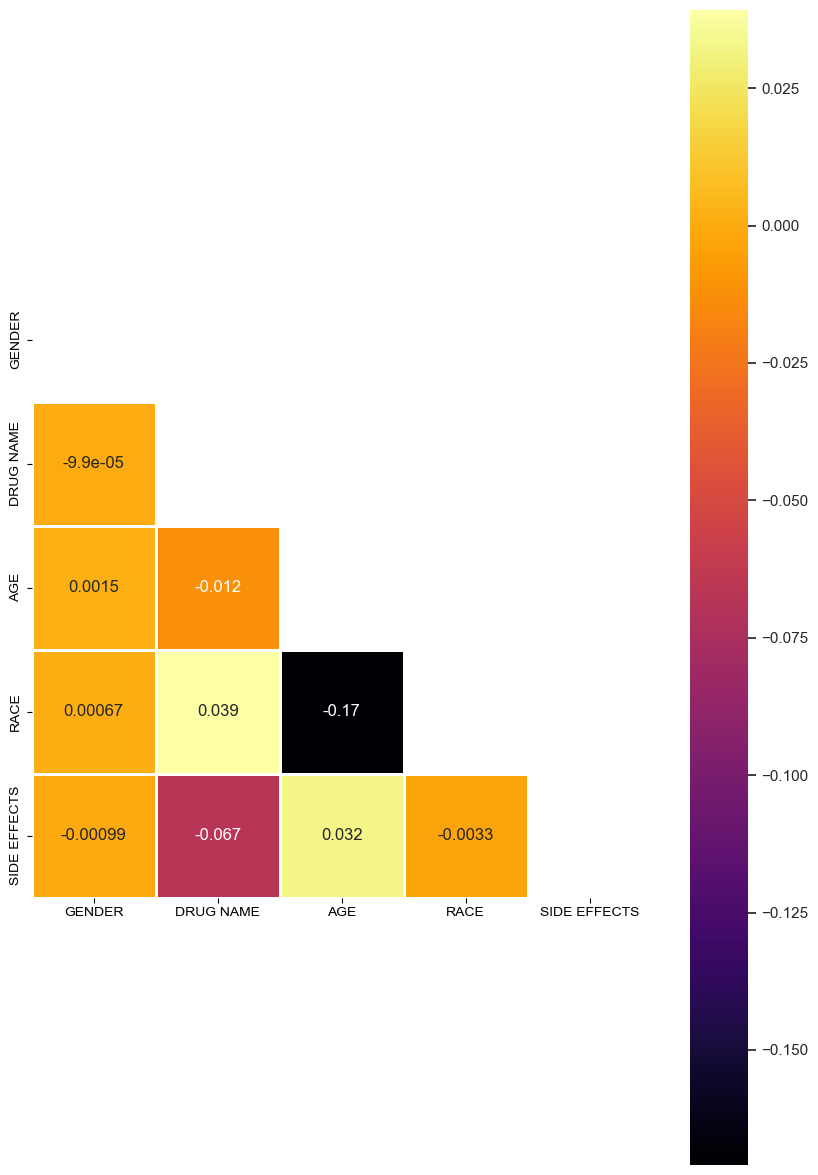

In [33]:
# Create the correlation heatmap 
from matplotlib import pyplot as plt
import seaborn as sns
corrmatrix = data01.corr()
plt.subplots(figsize=(10,15))
colormap = sns.color_palette("inferno", as_cmap=True)
sns.set_theme(style='darkgrid')
# Generating a mask for the upper triangle
mask = np.zeros_like(corrmatrix)
mask[np.triu_indices_from(mask)] = True
# Heatmap with the mask
sns.heatmap(corrmatrix,mask=mask, square=True, annot=True, linewidth=0.75, cmap=colormap)

In [34]:
data01.drop(['RACE'], axis=1, inplace=True)
data01.head(3)

,GENDER,DRUG NAME,AGE,SIDE EFFECTS
0,1,435,41.0,1
1,1,491,53.0,0
2,0,425,31.0,1


# MODELLING

In [35]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [36]:
# Splitting the Dataframe
# Independent variables
X = data01.drop(['SIDE EFFECTS'], axis=1)
# Dependent variables
y = data01['SIDE EFFECTS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state=42)

In [37]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

c:\Users\Shamnad S\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shamnad S\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Shamnad S\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7978
           1       0.33      0.92      0.49     46563
           2       0.00      0.00      0.00     26181
           3       0.28      0.08      0.13     40323
           4       0.00      0.00      0.00     18949

    accuracy                           0.33    139994
   macro avg       0.12      0.20      0.12    139994
weighted avg       0.19      0.33      0.20    139994

[[    0  7086     0   892     0]
 [    0 42868     0  3695     0]
 [    0 24193     0  1988     0]
 [    0 37013     0  3310     0]
 [    0 17192     0  1757     0]]
accuracy is 0.3298569938711659


c:\Users\Shamnad S\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7978
           1       0.97      0.97      0.97     46563
           2       0.97      0.97      0.97     26181
           3       0.97      0.97      0.97     40323
           4       0.99      0.96      0.97     18949

    accuracy                           0.97    139994
   macro avg       0.97      0.97      0.97    139994
weighted avg       0.97      0.97      0.97    139994

[[ 7705   173    41    35    24]
 [  334 45394   215   558    62]
 [   74   415 25282   330    80]
 [   67   718   303 39164    71]
 [   41   137   109   466 18196]]
accuracy is 0.9696201265768533


In [39]:
# Importing RandomForestClassifier sklearn.ensemble as RFC
from sklearn.ensemble import RandomForestClassifier as RFC
RModel=RFC(n_estimators=100, random_state=42)
# Training the model
RModel.fit(X_train,y_train)
y_Pred=RModel.predict(X_test)

In [40]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_Pred))
print(confusion_matrix(y_test, y_Pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_Pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7978
           1       0.98      0.97      0.98     46563
           2       0.98      0.97      0.98     26181
           3       0.97      0.98      0.97     40323
           4       0.98      0.98      0.98     18949

    accuracy                           0.98    139994
   macro avg       0.97      0.97      0.97    139994
weighted avg       0.98      0.98      0.98    139994

[[ 7629   248    34    42    25]
 [  197 45329   148   807    82]
 [   42   295 25525   251    68]
 [   21   201   290 39558   253]
 [   27    57    65   237 18563]]
accuracy is 0.9757846764861351


In [41]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7978
           1       0.98      0.98      0.98     46563
           2       0.98      0.98      0.98     26181
           3       0.97      0.98      0.98     40323
           4       0.98      0.98      0.98     18949

    accuracy                           0.98    139994
   macro avg       0.98      0.97      0.97    139994
weighted avg       0.98      0.98      0.98    139994

[[ 7639   246    31    39    23]
 [  192 45415   116   768    72]
 [   44   309 25531   237    60]
 [   21   195   281 39591   235]
 [   27    49    63   233 18577]]
accuracy is 0.9768490078146206
